# **Feature Selection (Top 20 Features)**

In [1]:
import csv
import pandas as pd
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt
import matplotlib_inline

from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression, SelectFromModel, RFE

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Import helperfunctions
from ML_functions import fun_load_settings, fun_load_data, fun_preprocessing, fun_load_best_params, fun_scores

# Set the default optimization problem for the case of manual executing the script (choose either "TSP" or "CVRP")
default_optimization_problem = "CVRP"

# Call the function to define optimization_problem based on how the notebook is executed
# If the notebook is run by the script "main.ipynb", load optimization_problem from "settings.json". Otherwise use the default optimization problem from above
optimization_problem = fun_load_settings(default_optimization_problem)

# Load data
data, _ = fun_load_data(optimization_problem)

# Do the train test split during the preprocessing
X_train, X_test, y_train, y_test, train_data = fun_preprocessing(data, train_size=0.8)

The notebook was executed by another notebook. :)
Optimization problem: 'TSP'


### **1. Univariate statistics**

**Univariate Statistical Test:**<br>
The score is derived from a univariate statistical test that evaluates each feature independently against the target variable.

- F-test in f_regression:<br>
    The F-test assesses the linear relationship between each feature and the target variable.<br>
    The test calculates the F-statistic for each feature, which is the ratio of explained variance to unexplained variance.

    Explained Variance: The variance in the target variable that can be explained by the feature.<br>
    Unexplained Variance: The variance in the target variable that remains unexplained by the feature.<br>
    -> A higher F-statistic indicates a stronger relationship between the feature and the target variable.<br>

- P-value:<br>
    Alongside the F-statistic, a p-value is computed to determine the statistical significance of the observed relationship.<br>
    The p-value indicates the probability of observing the computed F-statistic.

In [2]:
# Perform univariate feature selection (with SelectKBest or SelectPercentile)
select = SelectKBest(k=20, score_func=f_regression) #  Or: select = SelectPercentile(percentile=50, score_func=f_regression)

# Fit model on the train set
select.fit(X_train, y_train)
selected_f = list(select.get_feature_names_out())
dropped_f = np.array(X_train.columns[~select.get_support()])
X_train_selected = X_train[selected_f]

# Show shapes of DataFrames and names of selected and not selected features
print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))
print("\nSelected features:\n", np.array(selected_f))
print("\nNot selected features:\n", dropped_f)

X_train.shape: (72000, 35)
X_train_selected.shape: (72000, 20)

Selected features:
 ['Number Customers' 'Depot Distance Ratio'
 'Closest Customer Distance (CCD) Ratio' '2nd CCD Ratio' '3rd CCD Ratio'
 '4th CCD Ratio' '5th CCD Ratio' '6th CCD Ratio' '7th CCD Ratio'
 '8th CCD Ratio' 'Mean Distance To Other Customers Ratio'
 'Gravity Center Distance Ratio' 'Number Clusters' 'Cluster Size'
 'Centroid Distance To Depot Ratio' 'Cluster Area Ratio'
 'Cluster Density Ratio' 'Y Std' 'Savings Ratio' 'Marginal Cost Ratio']

Not selected features:
 ['X Ratio' 'Y Ratio' 'X Depot' 'Y Depot' 'X Centroid' 'Y Centroid' 'X Std'
 'X Max' 'Y Max' 'X Min' 'Y Min' 'Correlation' 'Skewness X' 'Skewness Y'
 'Total Cost']


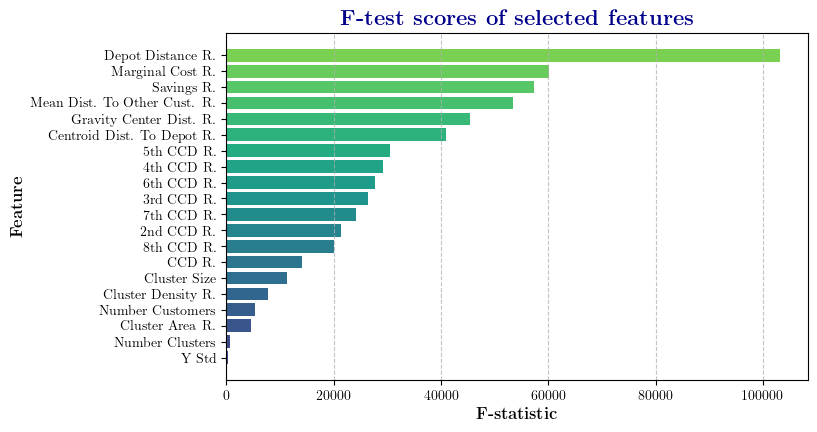

,,Y Std,Number Clusters,Cluster Area Ratio,Number Customers,Cluster Density Ratio,Cluster Size,Closest Customer Distance (CCD) Ratio,8th CCD Ratio,2nd CCD Ratio,7th CCD Ratio,3rd CCD Ratio,6th CCD Ratio,4th CCD Ratio,5th CCD Ratio,Centroid Distance To Depot Ratio,Gravity Center Distance Ratio,Mean Distance To Other Customers Ratio,Savings Ratio,Marginal Cost Ratio,Depot Distance Ratio
Index,Instance ID,,,,,,,,,,,,,,,,,,,,
0,1,18.432836,1,1.199907,6,0.011512,5,1.262503,1.000000,1.068225,1.000000,1.045933,1.000000,1.274274,1.211060,0.885295,1.442905,1.175178,0.022796,0.021584,0.320244
1,1,18.432836,1,0.000465,6,5.942439,1,1.419479,1.000000,1.246244,1.000000,1.253743,1.000000,1.131794,1.211060,1.573524,1.506247,1.230834,2.161204,2.365312,1.517015
2,1,18.432836,1,1.199907,6,0.011512,5,0.386302,1.000000,0.876273,1.000000,0.782974,1.000000,0.736554,0.865881,0.885295,0.523415,0.766016,0.186036,0.176144,0.851033
3,1,18.432836,1,1.199907,6,0.011512,5,0.386302,1.000000,0.880063,1.000000,0.735429,1.000000,0.758701,0.713908,0.885295,0.217502,0.718498,0.514850,0.487476,0.954254
4,1,18.432836,1,1.199907,6,0.011512,5,1.267963,1.000000,0.985226,1.000000,0.860173,1.000000,0.895617,0.970327,0.885295,0.960795,0.967599,0.101425,0.096032,0.939229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87195,8800,23.170161,3,1.091336,14,0.612257,4,1.616903,1.123762,1.515414,1.266313,1.352940,1.286811,1.396064,1.389226,0.704536,1.309130,1.180552,0.221144,0.734886,0.752539
87196,8800,23.170161,3,1.121606,14,1.191466,8,0.334684,0.822480,0.341777,0.629295,0.577589,0.472076,0.540410,0.497092,1.057276,0.603021,0.759284,0.818470,0.713184,0.979788
87197,8800,23.170161,3,1.121606,14,1.191466,8,0.725161,0.985038,0.591611,0.994572,0.520134,0.793338,0.595205,0.565039,1.057276,1.128442,0.971106,1.571307,1.369178,1.436241


In [3]:
# Set LaTeX style fonts in matplotlib
plt.rc("font", family="serif", serif="Computer Modern")
plt.rc("text", usetex=True)
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}"

# Create data frame with p-values and scores for all features
df_f_test = pd.DataFrame({"Feature": X_train.columns, "P-Value": select.pvalues_, 
                          "Scores F-test": select.scores_})

# Get selected features only and sort them by their score
df_f_test_selection = df_f_test.iloc[select.get_support()]
df_f_test_selection = df_f_test_selection.sort_values(by="Scores F-test")

# Make feature names shorter
selected_features = df_f_test_selection["Feature"] # Get feature names in the correct order
selected_features_s = [i.replace("Ratio", "R.") for i in selected_features]
selected_features_s = [i.replace("Closest Customer Distance (CCD)", "CCD") for i in selected_features_s]
selected_features_s = [i.replace("Mean Distance To Other Customers", "Mean Dist. To Other Cust.") for i in selected_features_s]
selected_features_s = [i.replace("Centroid Distance To Depot", "Centroid Dist. To Depot") for i in selected_features_s]
selected_features_s = [i.replace("Gravity Center Distance", "Gravity Center Dist.") for i in selected_features_s]

# Visualize scores of selected features
plt.figure(figsize=(7.5, 4.5))
plt.barh(y=selected_features_s, width=df_f_test_selection["Scores F-test"], 
         color=plt.cm.viridis(np.linspace(0.2, 0.8, len(df_f_test_selection))))

# Use LaTeX commands for bold text in the title and labels
plt.xlabel(r"\textbf{F-statistic}", size=12)
plt.ylabel(r"\textbf{Feature}", size=12)
plt.title(r"\textbf{F-test scores of selected features}", size=16, color="darkblue")
plt.grid(axis="x", linestyle="--", alpha=0.75)

# Save the plot as a PNG file with high quality
if (optimization_problem == "TSP"): plt.savefig("06_graphics/f_test_feature_importance.png", bbox_inches="tight", dpi=500)
plt.show()

# Display data frame with remaining features
display(X_train[selected_features])

In [4]:
# Compare the train score of a linear regression model with all features and with the selected features only
print("Train score with all features:")
model_results_dict = fun_scores(model=LinearRegression(), X_train=X_train, y_train=y_train)

# Add "Total Cost" as features for the scaling
if "Total Cost" not in selected_f: selected_f += ["Total Cost"]

print("\nTrain score with selected features:")
model_results_dict = fun_scores(model=LinearRegression(), X_train=X_train[selected_f], y_train=y_train, apply_scaling=True)

Train score with all features:
CV MAPE (scaled) train data: 20.64 %
CV RMSE (scaled) train data: 4.29
CV computation time: 3s

Train score with selected features:
CV MAPE (scaled) train data: 20.68 %
CV RMSE (scaled) train data: 4.3
CV computation time: 2s


### **2. Model-based feature selection**

In [5]:
# Load best parameters of the model and create the model
best_params = fun_load_best_params(optimization_problem, model_abbreviation="RF")
forest = RandomForestRegressor(n_estimators=100, **best_params, n_jobs=-1, random_state=42)

# Select all features with score (importance) above threshold
select = SelectFromModel(estimator=forest, threshold=0.0006) #0.0015

# Fit model on the train set
select.fit(X_train, y_train)
selected_f = list(select.get_feature_names_out())
dropped_f = np.array(X_train.columns[~select.get_support()])
X_train_selected = X_train[selected_f]

# Show shapes of DataFrames and names of selected and not selected features
print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))
print("\nSelected features:\n", np.array(selected_f))
print("\nNot selected features:\n", dropped_f)

{'min_samples_split': 11,
 'min_samples_leaf': 6,
 'min_impurity_decrease': 0.0001,
 'max_leaf_nodes': None,
 'max_features': 25,
 'max_depth': 13}

X_train.shape: (72000, 35)
X_train_selected.shape: (72000, 23)

Selected features:
 ['Number Customers' 'X Depot' 'Y Depot' 'Depot Distance Ratio'
 'Closest Customer Distance (CCD) Ratio' '2nd CCD Ratio' '3rd CCD Ratio'
 '4th CCD Ratio' '5th CCD Ratio' '6th CCD Ratio' '7th CCD Ratio'
 '8th CCD Ratio' 'Mean Distance To Other Customers Ratio'
 'Gravity Center Distance Ratio' 'Cluster Size'
 'Centroid Distance To Depot Ratio' 'Cluster Area Ratio'
 'Cluster Density Ratio' 'X Std' 'Y Std' 'Savings Ratio'
 'Marginal Cost Ratio' 'Total Cost']

Not selected features:
 ['X Ratio' 'Y Ratio' 'Number Clusters' 'X Centroid' 'Y Centroid' 'X Max'
 'Y Max' 'X Min' 'Y Min' 'Correlation' 'Skewness X' 'Skewness Y']


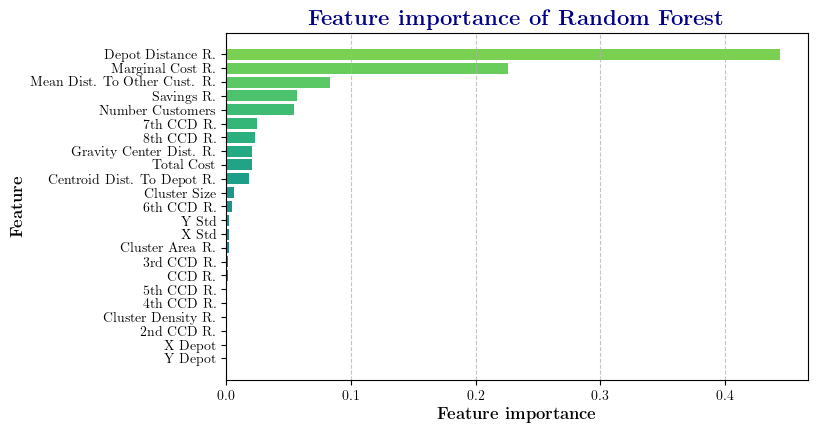

,,Number Customers,X Depot,Y Depot,Depot Distance Ratio,Closest Customer Distance (CCD) Ratio,2nd CCD Ratio,3rd CCD Ratio,4th CCD Ratio,5th CCD Ratio,6th CCD Ratio,...,Gravity Center Distance Ratio,Cluster Size,Centroid Distance To Depot Ratio,Cluster Area Ratio,Cluster Density Ratio,X Std,Y Std,Savings Ratio,Marginal Cost Ratio,Total Cost
Index,Instance ID,,,,,,,,,,,,,,,,,,,,,
0,1,6,2.380844,66.016752,0.320244,1.262503,1.068225,1.045933,1.274274,1.211060,1.000000,...,1.442905,5,0.885295,1.199907,0.011512,21.621684,18.432836,0.022796,0.021584,227.291186
1,1,6,2.380844,66.016752,1.517015,1.419479,1.246244,1.253743,1.131794,1.211060,1.000000,...,1.506247,1,1.573524,0.000465,5.942439,21.621684,18.432836,2.161204,2.365312,227.291186
2,1,6,2.380844,66.016752,0.851033,0.386302,0.876273,0.782974,0.736554,0.865881,1.000000,...,0.523415,5,0.885295,1.199907,0.011512,21.621684,18.432836,0.186036,0.176144,227.291186
3,1,6,2.380844,66.016752,0.954254,0.386302,0.880063,0.735429,0.758701,0.713908,1.000000,...,0.217502,5,0.885295,1.199907,0.011512,21.621684,18.432836,0.514850,0.487476,227.291186
4,1,6,2.380844,66.016752,0.939229,1.267963,0.985226,0.860173,0.895617,0.970327,1.000000,...,0.960795,5,0.885295,1.199907,0.011512,21.621684,18.432836,0.101425,0.096032,227.291186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87195,8800,14,38.864948,59.493924,0.752539,1.616903,1.515414,1.352940,1.396064,1.389226,1.286811,...,1.309130,4,0.704536,1.091336,0.612257,31.156907,23.170161,0.221144,0.734886,322.725634
87196,8800,14,38.864948,59.493924,0.979788,0.334684,0.341777,0.577589,0.540410,0.497092,0.472076,...,0.603021,8,1.057276,1.121606,1.191466,31.156907,23.170161,0.818470,0.713184,322.725634
87197,8800,14,38.864948,59.493924,1.436241,0.725161,0.591611,0.520134,0.595205,0.565039,0.793338,...,1.128442,8,1.057276,1.121606,1.191466,31.156907,23.170161,1.571307,1.369178,322.725634


In [6]:
# Create data frame with feature importance s for all features
df_model_based = pd.DataFrame({"Feature": X_train.columns, 
                               "Scores model-based selection": select.estimator_.feature_importances_})

# Get selected features only and sort them by their score
df_model_based_selection = df_model_based.iloc[select.get_support()]
df_model_based_selection = df_model_based_selection.sort_values(by="Scores model-based selection").reset_index(drop=True)

# Make feature names shorter
selected_features = df_model_based_selection["Feature"] # Get feature names in the correct order
selected_features_s = [i.replace("Ratio", "R.") for i in selected_features]
selected_features_s = [i.replace("Closest Customer Distance (CCD)", "CCD") for i in selected_features_s]
selected_features_s = [i.replace("Mean Distance To Other Customers", "Mean Dist. To Other Cust.") for i in selected_features_s]
selected_features_s = [i.replace("Centroid Distance To Depot", "Centroid Dist. To Depot") for i in selected_features_s]
selected_features_s = [i.replace("Gravity Center Distance", "Gravity Center Dist.") for i in selected_features_s]

# Visualize scores of selected features
plt.figure(figsize=(7.5, 4.5))
plt.barh(y=selected_features_s, width=df_model_based_selection["Scores model-based selection"], 
         color=plt.cm.viridis(np.linspace(0.2, 0.8, len(df_model_based_selection))))

# Use LaTeX commands for bold text in the title and labels
plt.xlabel(r"\textbf{Feature importance}", size=12)
plt.ylabel(r"\textbf{Feature}", size=12)
plt.title(r"\textbf{Feature importance of Random Forest}", size=16, color="darkblue")
plt.grid(axis="x", linestyle="--", alpha=0.75)

# Save the plot as a PNG file with high quality
if (optimization_problem == "TSP"): plt.savefig("06_graphics/model_based_feature_importance.png", bbox_inches="tight", dpi=500)
plt.show()

# Display data frame with remaining features
display(X_train[selected_f])

In [7]:
# Compare the train score of the random forest model with all features and with the selected features only
print("Train score with all features:")
model_results_dict = fun_scores(model=forest, X_train=X_train, y_train=y_train)

# Add "Total Cost" as features for the scaling
if "Total Cost" not in selected_f: selected_f += ["Total Cost"]

print("\nTrain score with selected features:")
model_results_dict = fun_scores(model=forest, X_train=X_train[selected_f], y_train=y_train)

Train score with all features:
CV MAPE (scaled) train data: 7.99 %
CV RMSE (scaled) train data: 2.41
CV computation time: 37s

Train score with selected features:
CV MAPE (scaled) train data: 8.06 %
CV RMSE (scaled) train data: 2.46
CV computation time: 35s


### **3. Iterative feature selection (recursive feature elimination)**

In [8]:
# Load best parameters of the model and create the model
best_params = fun_load_best_params(optimization_problem, model_abbreviation="XGBoost")
xgboost = xgb.XGBRegressor(n_estimators=100, objective="reg:squarederror", **best_params, random_state=42)

# Apply recursive feature elimination
select = RFE(estimator=xgboost, n_features_to_select=20)

# Fit model on the train set
select.fit(X_train, y_train)
selected_f = list(select.get_feature_names_out())
dropped_f = np.array(X_train.columns[~select.get_support()])
X_train_selected = X_train[selected_f]

# Show shapes of DataFrames and names of selected and not selected features
print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))
print("\nSelected features:\n", np.array(selected_f))
print("\nNot selected features:\n", dropped_f)

{'colsample_bytree': 1.0,
 'learning_rate': 0.05,
 'max_depth': 7,
 'subsample': 0.8}

X_train.shape: (72000, 35)
X_train_selected.shape: (72000, 20)

Selected features:
 ['Number Customers' 'X Depot' 'Y Depot' 'Depot Distance Ratio'
 'Closest Customer Distance (CCD) Ratio' '4th CCD Ratio' '5th CCD Ratio'
 '6th CCD Ratio' '7th CCD Ratio' '8th CCD Ratio'
 'Mean Distance To Other Customers Ratio' 'Gravity Center Distance Ratio'
 'Cluster Size' 'Centroid Distance To Depot Ratio' 'Cluster Area Ratio'
 'X Std' 'Y Std' 'Savings Ratio' 'Marginal Cost Ratio' 'Total Cost']

Not selected features:
 ['X Ratio' 'Y Ratio' '2nd CCD Ratio' '3rd CCD Ratio' 'Number Clusters'
 'X Centroid' 'Y Centroid' 'Cluster Density Ratio' 'X Max' 'Y Max' 'X Min'
 'Y Min' 'Correlation' 'Skewness X' 'Skewness Y']


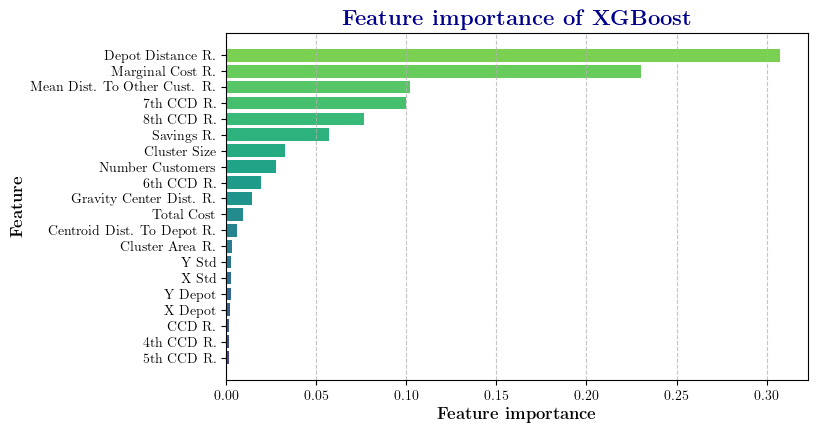

,,Number Customers,X Depot,Y Depot,Depot Distance Ratio,Closest Customer Distance (CCD) Ratio,4th CCD Ratio,5th CCD Ratio,6th CCD Ratio,7th CCD Ratio,8th CCD Ratio,Mean Distance To Other Customers Ratio,Gravity Center Distance Ratio,Cluster Size,Centroid Distance To Depot Ratio,Cluster Area Ratio,X Std,Y Std,Savings Ratio,Marginal Cost Ratio,Total Cost
Index,Instance ID,,,,,,,,,,,,,,,,,,,,
0,1,6,2.380844,66.016752,0.320244,1.262503,1.274274,1.211060,1.000000,1.000000,1.000000,1.175178,1.442905,5,0.885295,1.199907,21.621684,18.432836,0.022796,0.021584,227.291186
1,1,6,2.380844,66.016752,1.517015,1.419479,1.131794,1.211060,1.000000,1.000000,1.000000,1.230834,1.506247,1,1.573524,0.000465,21.621684,18.432836,2.161204,2.365312,227.291186
2,1,6,2.380844,66.016752,0.851033,0.386302,0.736554,0.865881,1.000000,1.000000,1.000000,0.766016,0.523415,5,0.885295,1.199907,21.621684,18.432836,0.186036,0.176144,227.291186
3,1,6,2.380844,66.016752,0.954254,0.386302,0.758701,0.713908,1.000000,1.000000,1.000000,0.718498,0.217502,5,0.885295,1.199907,21.621684,18.432836,0.514850,0.487476,227.291186
4,1,6,2.380844,66.016752,0.939229,1.267963,0.895617,0.970327,1.000000,1.000000,1.000000,0.967599,0.960795,5,0.885295,1.199907,21.621684,18.432836,0.101425,0.096032,227.291186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87195,8800,14,38.864948,59.493924,0.752539,1.616903,1.396064,1.389226,1.286811,1.266313,1.123762,1.180552,1.309130,4,0.704536,1.091336,31.156907,23.170161,0.221144,0.734886,322.725634
87196,8800,14,38.864948,59.493924,0.979788,0.334684,0.540410,0.497092,0.472076,0.629295,0.822480,0.759284,0.603021,8,1.057276,1.121606,31.156907,23.170161,0.818470,0.713184,322.725634
87197,8800,14,38.864948,59.493924,1.436241,0.725161,0.595205,0.565039,0.793338,0.994572,0.985038,0.971106,1.128442,8,1.057276,1.121606,31.156907,23.170161,1.571307,1.369178,322.725634


In [9]:
# Create data frame with feature importances for all selected features
df_iterative_selection = pd.DataFrame({"Feature": X_train.columns[select.get_support()], 
                                       "Scores iterative selection": select.estimator_.feature_importances_})

# Sort features
df_iterative_selection = df_iterative_selection.sort_values(by="Scores iterative selection").reset_index(drop=True)

# Make feature names shorter
selected_features = df_iterative_selection["Feature"] # Get feature names in the correct order
selected_features_s = [i.replace("Ratio", "R.") for i in selected_features]
selected_features_s = [i.replace("Closest Customer Distance (CCD)", "CCD") for i in selected_features_s]
selected_features_s = [i.replace("Mean Distance To Other Customers", "Mean Dist. To Other Cust.") for i in selected_features_s]
selected_features_s = [i.replace("Centroid Distance To Depot", "Centroid Dist. To Depot") for i in selected_features_s]
selected_features_s = [i.replace("Gravity Center Distance", "Gravity Center Dist.") for i in selected_features_s]

# Visualize scores of selected features
plt.figure(figsize=(7.5, 4.5))
plt.barh(y=selected_features_s, width=df_iterative_selection["Scores iterative selection"], 
         color=plt.cm.viridis(np.linspace(0.2, 0.8, len(df_iterative_selection))))

# Use LaTeX commands for bold text in the title and labels
plt.xlabel(r"\textbf{Feature importance}", size=12)
plt.ylabel(r"\textbf{Feature}", size=12)
plt.title(r"\textbf{Feature importance of XGBoost}", size=16, color="darkblue")
plt.grid(axis="x", linestyle="--", alpha=0.75)

# Save the plot as a PNG file with high quality
if (optimization_problem == "TSP"): plt.savefig("06_graphics/iterative_selection_feature_importance.png", bbox_inches="tight", dpi=500)
plt.show()

# Display data frame with remaining features
display(X_train[selected_f])

In [10]:
# Compare the train score of the xgboost model with all features and with the selected features only
print("Train score with all features:")
model_results_dict = fun_scores(model=xgboost, X_train=X_train, y_train=y_train)

# Add "Total Cost" as features for the scaling
if "Total Cost" not in selected_f: selected_f += ["Total Cost"]

print("\nTrain score with selected features:")
model_results_dict = fun_scores(model=xgboost, X_train=X_train[selected_f], y_train=y_train)

Train score with all features:
CV MAPE (scaled) train data: 7.61 %
CV RMSE (scaled) train data: 2.08
CV computation time: 3s

Train score with selected features:
CV MAPE (scaled) train data: 7.670000000000001 %
CV RMSE (scaled) train data: 2.11
CV computation time: 2s


### **Analyse resullts**

In [11]:
# Get a set of all feature selections
A = set(df_f_test_selection["Feature"])
B = set(df_model_based_selection["Feature"])
C = set(df_iterative_selection["Feature"])

# Get a list of the union of selected features and count the number of appearances for all features
all_features = list(A) + list(B) + list(C)
feature_counts = pd.Series(all_features).value_counts()

# Create a data frame with all at least once selected features and add their scores from the three methods
df_all_scores = pd.DataFrame(data={"Feature": feature_counts.index,
                                   "Counts": feature_counts})
df_all_scores = pd.merge(left=df_all_scores, right=df_f_test_selection[["Feature", "Scores F-test"]], on="Feature", how="outer")
df_all_scores = pd.merge(left=df_all_scores, right=df_model_based_selection, on="Feature", how="outer")
df_all_scores = pd.merge(left=df_all_scores, right=df_iterative_selection, on="Feature", how="outer")

# Sort the features by their counts, xgboost, F-test and random forest scores
ranking_order = ["Counts", "Scores iterative selection", "Scores F-test", "Scores model-based selection"]
df_all_scores.sort_values(by=ranking_order, ascending=False, inplace=True)
df_all_scores.reset_index(drop=True, inplace=True)
df_all_scores

,Feature,Counts,Scores F-test,Scores model-based selection,Scores iterative selection
0,Depot Distance Ratio,3,103116.405837,0.444134,0.307365
1,Marginal Cost Ratio,3,60092.267751,0.226028,0.230515
2,Mean Distance To Other Customers Ratio,3,53341.302650,0.083013,0.101955
3,7th CCD Ratio,3,24113.220334,0.024627,0.099838
4,8th CCD Ratio,3,20038.388482,0.022805,0.076602
5,Savings Ratio,3,57409.805634,0.056597,0.056939
6,Cluster Size,3,11245.696172,0.005897,0.032372
7,Number Customers,3,5444.224981,0.054027,0.027881
8,6th CCD Ratio,3,27788.860627,0.004364,0.019505
9,Gravity Center Distance Ratio,3,45468.918987,0.020920,0.014083


In [12]:
# Select the top 20 features
top20_features = list(df_all_scores.iloc[:20]["Feature"])
print(np.array(top20_features))

# Save the list into a .csv-file
with open(f"02_best_features/{optimization_problem}_top20_features", "w") as f:
    write = csv.writer(f)
    write.writerow(top20_features)

# Set matplotlib style fonts to default again
plt.rcdefaults()

['Depot Distance Ratio' 'Marginal Cost Ratio'
 'Mean Distance To Other Customers Ratio' '7th CCD Ratio' '8th CCD Ratio'
 'Savings Ratio' 'Cluster Size' 'Number Customers' '6th CCD Ratio'
 'Gravity Center Distance Ratio' 'Centroid Distance To Depot Ratio'
 'Cluster Area Ratio' 'Y Std' 'Closest Customer Distance (CCD) Ratio'
 '4th CCD Ratio' '5th CCD Ratio' 'Total Cost' 'X Std' 'Y Depot' 'X Depot']
